## Neural Networks for multiclass classification

### Eval function, data & packages

In [1]:
# evaluation function

def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

In [2]:
def plot_learning_curves(history):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    # accuracy learning curves
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'validation'], loc='upper left')
    # loss learning curves
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'test'], loc='upper right')
    fig.tight_layout()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import itertools

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
x_train = loadtxt('processed_data/x_train.csv', delimiter=',')
x_validation = loadtxt('processed_data/x_validation.csv', delimiter=',')
y_train = loadtxt('processed_data/y_train.csv', delimiter=',')
y_validation = loadtxt('processed_data/y_validation.csv', delimiter=',')

print('X train shape: {} '.format(x_train.shape))
print('X validation shape: {} '.format(x_validation.shape))

X train shape: (1600, 1024) 
X validation shape: (109, 1024) 


### Data preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)

x_train.round(3)

array([[0.094, 0.12 , 0.149, ..., 0.001, 0.001, 0.002],
       [0.557, 0.59 , 0.558, ..., 0.002, 0.002, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.251, 0.269, 0.265, ..., 0.001, 0.002, 0.002],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [6]:
from keras.utils import np_utils

#y_train = pd.get_dummies(Y)
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)

y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## NN model

### Quite good multiclass neural network with 3 layers after some attempts

In [7]:
# Create model
model = Sequential()
model.add(Dense(15, input_dim = 1024, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'softmax')) # Softmax for multi-class classification

# Compile model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(learning_rate=0.01), # stochastic gradient descent 
              metrics = ['accuracy'])

# Fit saving history
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), batch_size=10, epochs=100, verbose=0)

The data in history dict refers to: ['loss', 'accuracy', 'val_loss', 'val_accuracy']


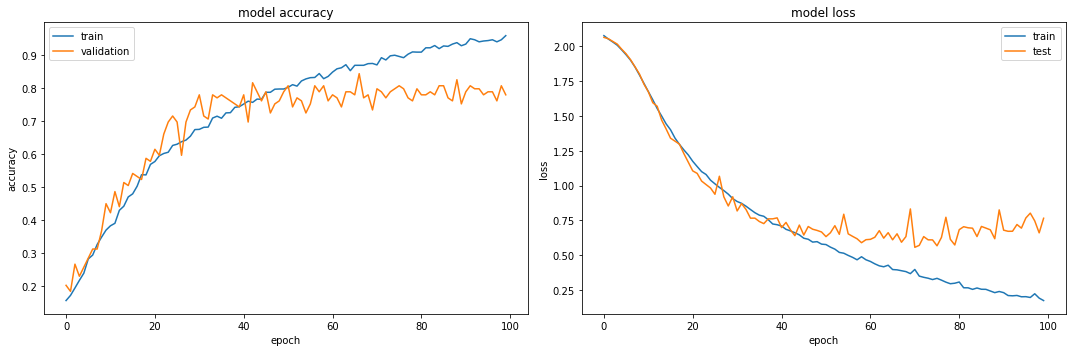

In [8]:
# list the data in history dict
print(f'The data in history dict refers to: {list(history.history.keys())}')

# plot learning curves
plot_learning_curves(history)

In [9]:
# make predictions on validation set
y_pred = model.predict(x_validation).round(0)

# evaluate on test set
accuracy(y_pred, y_validation)

0.9529816513761468

### Network optimization with a function that trains the network and returns accuracy

In [7]:
# create a function that returns accuracy given parameters

def create_nn(input_dimension,
              last_layer_nodes,
              last_layer_function, # params related to data
              
              n_layers,
              layers_nodes,
              act_function, # params related to nn structure

              loss_function,
              learning_rate_value,
              dropout_value, # params related to model
              
              number_epochs,
              batch_size_value, # params related to fit

              verbose = True):

    # Create model with dropout
    model = Sequential()
    model.add(Dropout(dropout_value))

    # Add layers to model
    model.add(Dense(layers_nodes, input_dim = input_dimension, activation = act_function))
    for i in range(0,n_layers-2):
        model.add(Dense(layers_nodes, activation = act_function))
    model.add(Dense(last_layer_nodes, activation = last_layer_function))

    # Compile model
    model.compile(loss = loss_function, 
                  optimizer = keras.optimizers.SGD(learning_rate=learning_rate_value),
                  metrics = ['accuracy'])

    # Fit saving history
    history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), 
                        batch_size=batch_size_value, epochs=number_epochs, verbose=0)

    # Make predictions on validation set
    y_pred = model.predict(x_validation).round(0)

    if verbose:

        # Print result and plot learning curves
        print(f'''PARAMS FOR NN STRUCTURE:
n_layers = {n_layers}, 
layers_nodes = {layers_nodes},
act_function = {act_function},

PARAMS RELATED TO MODEL:
loss_function = {loss_function},
learning_rate_value = {learning_rate_value},
dropout_value = {dropout_value}

PARAMS RELATED TO FIT:
batch_size_value = {batch_size_value},
number_epochs = {number_epochs}
''')
        print(f'Accuracy of the neural network: {accuracy(y_pred, y_validation)}')
        plot_learning_curves(history)

    return accuracy(y_pred, y_validation)

PARAMS FOR NN STRUCTURE:
n_layers = 3, 
layers_nodes = 15,
act_function = relu,

PARAMS RELATED TO MODEL:
loss_function = categorical_crossentropy,
learning_rate_value = 0.01,
dropout_value = 0.2

PARAMS RELATED TO FIT:
batch_size_value = 10,
number_epochs = 100

Accuracy of the neural network: 0.9495412844036697


0.9495412844036697

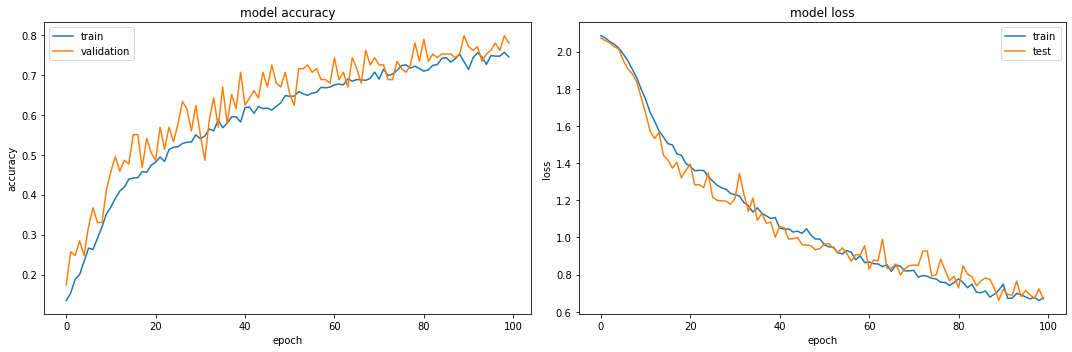

In [8]:
# create and evaluate the network with initial quite good parameters, like in previous model

create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          n_layers = 3, layers_nodes = 15, act_function = 'relu', # params for nn structure
          learning_rate_value = 0.01, dropout_value = 0.2, # params related to model
          batch_size_value = 10, number_epochs = 100 # params related to fit 
          )

In [20]:
# evaluate same model 5 times and return the avg accruacy

quite_good_accuracy = []
for i in range(5):
    quite_good_accuracy.append(create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          n_layers = 3, layers_nodes = 15, act_function = 'relu', # params for nn structure
          learning_rate_value = 0.01, dropout_value = 0.2, # params related to model
          batch_size_value = 10, number_epochs = 100, # params related to fit 
          verbose = False))
print(f'We\'ll search for an accuracy higher than {np.mean(quite_good_accuracy)}')

We'll search for an accuracy higher than 0.9461009174311927


In [12]:
# try to get a better accuracy with a parameter search on structure params

structure_params = {'n_layers':[3,4],'layers_nodes':[15,20,1024],'act_function':['relu','sigmoid']}

keys, values = zip(*structure_params.items())
structure_params_permutations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# show some combinations
structure_params_permutations[:4]

[{'n_layers': 3, 'layers_nodes': 15, 'act_function': 'relu'},
 {'n_layers': 3, 'layers_nodes': 20, 'act_function': 'relu'},
 {'n_layers': 3, 'layers_nodes': 1024, 'act_function': 'relu'},
 {'n_layers': 4, 'layers_nodes': 15, 'act_function': 'relu'}]

In [13]:
# add the average accuracy among 5 model evaluatings to the dictionaries 
# WARNING: It takes the time to train 12*5 networks

for i in range(len(structure_params_permutations)):
    avg_accuracy = [] 
    for times in range(5):
        avg_accuracy.append(create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          **structure_params_permutations[i], # params for nn structure
          learning_rate_value = 0.01, dropout_value = 0.2, # params related to model
          batch_size_value = 10, number_epochs = 100, # params related to fit 
          verbose = False))
    structure_params_permutations[i]['avg_accuracy'] = np.mean(avg_accuracy)

In [14]:
# sort the models by descending accuracy for finding the best one

sorted(structure_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True)

[{'n_layers': 3,
  'layers_nodes': 1024,
  'act_function': 'relu',
  'avg_accuracy': 0.9756880733944954},
 {'n_layers': 4,
  'layers_nodes': 1024,
  'act_function': 'relu',
  'avg_accuracy': 0.9724770642201837},
 {'n_layers': 3,
  'layers_nodes': 20,
  'act_function': 'relu',
  'avg_accuracy': 0.9550458715596329},
 {'n_layers': 4,
  'layers_nodes': 20,
  'act_function': 'relu',
  'avg_accuracy': 0.9527522935779817},
 {'n_layers': 3,
  'layers_nodes': 15,
  'act_function': 'relu',
  'avg_accuracy': 0.9509174311926605},
 {'n_layers': 4,
  'layers_nodes': 15,
  'act_function': 'relu',
  'avg_accuracy': 0.9467889908256881}]

In [35]:
# create a table and show 5 best structure params combinations
 
pd.DataFrame(sorted(structure_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True), columns=['avg_accuracy','n_layers','layers_nodes','act_function']).head(5)

,avg_accuracy,n_layers,layers_nodes,act_function
0,0.975688,3,1024,relu
1,0.972477,4,1024,relu
2,0.955046,3,20,relu
3,0.952752,4,20,relu
4,0.950917,3,15,relu


In [18]:
# try to get a better accuracy with a parameter search on model params

model_params = {'learning_rate_value':[0.005,0.01,0.02],'dropout_value':[0.1,0.2,0.3,0.5]}

keys, values = zip(*model_params.items())
model_params_permutations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# show some combinations
model_params_permutations[:4]

[{'learning_rate_value': 0.005, 'dropout_value': 0.1},
 {'learning_rate_value': 0.005, 'dropout_value': 0.2},
 {'learning_rate_value': 0.005, 'dropout_value': 0.3},
 {'learning_rate_value': 0.005, 'dropout_value': 0.5}]

In [19]:
# add the average accuracy among 5 model evaluatings to the dictionaries 
# WARNING: It takes the time to train 12*5 networks

for i in range(len(model_params_permutations)):
    avg_accuracy = [] 
    for times in range(5):
        avg_accuracy.append(create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          n_layers = 3, layers_nodes = 1024, act_function = 'relu', # best params for nn structure from previous parameter search
          **model_params_permutations[i], # params related to model
          batch_size_value = 10, number_epochs = 100, # params related to fit 
          verbose = False))
    model_params_permutations[i]['avg_accuracy'] = np.mean(avg_accuracy)

In [20]:
# sort the models by descending accuracy for finding the best one

sorted(model_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True)

[{'learning_rate_value': 0.005,
  'dropout_value': 0.1,
  'avg_accuracy': 0.9775229357798165},
 {'learning_rate_value': 0.02,
  'dropout_value': 0.1,
  'avg_accuracy': 0.9772935779816514},
 {'learning_rate_value': 0.02,
  'dropout_value': 0.2,
  'avg_accuracy': 0.9761467889908257},
 {'learning_rate_value': 0.005,
  'dropout_value': 0.2,
  'avg_accuracy': 0.9745412844036698},
 {'learning_rate_value': 0.01,
  'dropout_value': 0.3,
  'avg_accuracy': 0.9733944954128442},
 {'learning_rate_value': 0.01,
  'dropout_value': 0.2,
  'avg_accuracy': 0.9724770642201834},
 {'learning_rate_value': 0.01,
  'dropout_value': 0.1,
  'avg_accuracy': 0.9722477064220183},
 {'learning_rate_value': 0.01,
  'dropout_value': 0.5,
  'avg_accuracy': 0.9711009174311928},
 {'learning_rate_value': 0.005,
  'dropout_value': 0.3,
  'avg_accuracy': 0.9706422018348624},
 {'learning_rate_value': 0.02,
  'dropout_value': 0.3,
  'avg_accuracy': 0.9706422018348624},
 {'learning_rate_value': 0.02,
  'dropout_value': 0.5,
  

In [37]:
pd.DataFrame(sorted(model_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True), columns=['avg_accuracy','learning_rate_value','dropout_value']).head(5)

,avg_accuracy,learning_rate_value,dropout_value
0,0.977523,0.005,0.1
1,0.977294,0.020,0.1
2,0.976147,0.020,0.2
3,0.974541,0.005,0.2
4,0.973394,0.010,0.3


In [23]:
# try to get a better accuracy with a parameter search on model params

fit_params = {'batch_size_value':[5,10,20],'number_epochs':[75,100,125]}

keys, values = zip(*fit_params.items())
fit_params_permutations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# show some combinations
fit_params_permutations[:4]

[{'batch_size_value': 5, 'number_epochs': 75},
 {'batch_size_value': 5, 'number_epochs': 100},
 {'batch_size_value': 5, 'number_epochs': 125},
 {'batch_size_value': 10, 'number_epochs': 75}]

In [24]:
# add the average accuracy among 5 model evaluatings to the dictionaries 
# WARNING: It takes the time to train 9*5 networks

for i in range(len(fit_params_permutations)):
    avg_accuracy = [] 
    for times in range(5):
        avg_accuracy.append(create_nn(input_dimension = 1024 ,last_layer_nodes = 8, last_layer_function = 'softmax', loss_function = 'categorical_crossentropy', # params for our challenge
          n_layers = 3, layers_nodes = 1024, act_function = 'relu', # params for nn structure
          learning_rate_value = 0.005, dropout_value = 0.1, # params related to model
          **fit_params_permutations[i], # params related to fit 
          verbose = False))
    fit_params_permutations[i]['avg_accuracy'] = np.mean(avg_accuracy)

In [25]:
# sort the models by descending accuracy for finding the best one

sorted(fit_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True)

[{'batch_size_value': 10,
  'number_epochs': 125,
  'avg_accuracy': 0.9756880733944955},
 {'batch_size_value': 10,
  'number_epochs': 100,
  'avg_accuracy': 0.9745412844036698},
 {'batch_size_value': 5,
  'number_epochs': 75,
  'avg_accuracy': 0.9745412844036696},
 {'batch_size_value': 20,
  'number_epochs': 125,
  'avg_accuracy': 0.9738532110091743},
 {'batch_size_value': 5,
  'number_epochs': 125,
  'avg_accuracy': 0.9724770642201834},
 {'batch_size_value': 10,
  'number_epochs': 75,
  'avg_accuracy': 0.9722477064220184},
 {'batch_size_value': 5,
  'number_epochs': 100,
  'avg_accuracy': 0.9720183486238533},
 {'batch_size_value': 20,
  'number_epochs': 100,
  'avg_accuracy': 0.9681192660550458},
 {'batch_size_value': 20,
  'number_epochs': 75,
  'avg_accuracy': 0.956651376146789}]

In [33]:
fit_best = pd.DataFrame(sorted(fit_params_permutations, key=lambda k: k['avg_accuracy'], reverse=True), columns=['avg_accuracy','batch_size_value','number_epochs']).head(5) 
fit_best
#print(fit_best.to_latex(index=False)) 

,avg_accuracy,batch_size_value,number_epochs
0,0.975688,10,125
1,0.974541,10,100
2,0.974541,5,75
3,0.973853,20,125
4,0.972477,5,125


In [29]:
# Create the best model according to params search

model = Sequential()
model.add(Dropout(0.1))

# Add layers to model
model.add(Dense(1024, input_dim = 1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

# Compile model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(learning_rate=0.005),
              metrics = ['accuracy'])

# Fit saving history
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), 
                    batch_size=10, epochs=125, verbose=2)

Epoch 1/125
160/160 - 3s - loss: 2.0610 - accuracy: 0.1900 - val_loss: 2.0354 - val_accuracy: 0.1743
Epoch 2/125
160/160 - 2s - loss: 1.9860 - accuracy: 0.2912 - val_loss: 1.9478 - val_accuracy: 0.3486
Epoch 3/125
160/160 - 2s - loss: 1.9224 - accuracy: 0.3719 - val_loss: 1.8831 - val_accuracy: 0.4771
Epoch 4/125
160/160 - 2s - loss: 1.8512 - accuracy: 0.4087 - val_loss: 1.8159 - val_accuracy: 0.4587
Epoch 5/125
160/160 - 2s - loss: 1.7807 - accuracy: 0.4600 - val_loss: 1.7608 - val_accuracy: 0.4862
Epoch 6/125
160/160 - 2s - loss: 1.7079 - accuracy: 0.4806 - val_loss: 1.6548 - val_accuracy: 0.5780
Epoch 7/125
160/160 - 2s - loss: 1.6409 - accuracy: 0.4938 - val_loss: 1.5848 - val_accuracy: 0.5596
Epoch 8/125
160/160 - 2s - loss: 1.5674 - accuracy: 0.5281 - val_loss: 1.5669 - val_accuracy: 0.5321
Epoch 9/125
160/160 - 2s - loss: 1.5096 - accuracy: 0.5263 - val_loss: 1.4456 - val_accuracy: 0.5872
Epoch 10/125
160/160 - 2s - loss: 1.4523 - accuracy: 0.5419 - val_loss: 1.3926 - val_accura

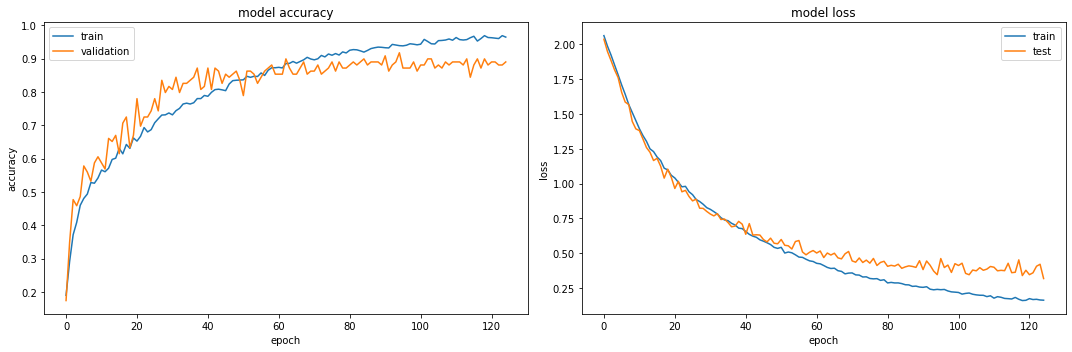

In [30]:
plot_learning_curves(history)

In [31]:
y_pred = model.predict(x_validation).round(0)
accuracy(y_pred, y_validation)

0.9782110091743119